In [56]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv('Google_Stock_Price_Train.csv', index_col='Date')

In [6]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [11]:
len(df)

1258

In [19]:
X_lol = df['Open']

In [84]:
X_lol2 = df.iloc[:, 1:2].values

In [85]:
X_lol2 = df.iloc[0:(len(df) - 60), 1:2]

In [87]:
X_lol2.shape

(1198, 1)

In [88]:
df.shape

(1258, 5)

In [18]:
################################################33

In [57]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [58]:
training_set.shape

(1258, 1)

In [59]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [60]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [61]:
training_set_scaled.shape

(1258, 1)

In [62]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [63]:
X_train.shape

(1198, 60)

In [64]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [65]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [66]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [67]:
X_train.shape

(1198, 60, 1)

In [68]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [69]:
# Initialising the RNN
regressor = Sequential()

In [70]:
X_train.shape[1], 1

(60, 1)

In [71]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [72]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [73]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [74]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [75]:
# Adding the output layer
regressor.add(Dense(units = 1))


In [76]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [77]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0543
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0072
Epoch 3/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0057
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0063
Epoch 5/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0054
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0050
Epoch 11/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [==============================] - 9s 7ms/step - 

1198/1198 [==============================] - 8s 6ms/step - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0013
Epoch 100/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0013


In [78]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [79]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

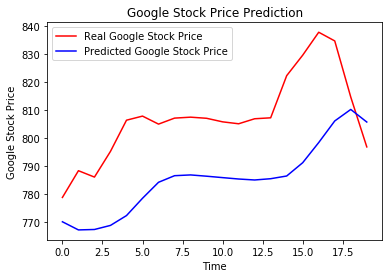

In [80]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
################################################

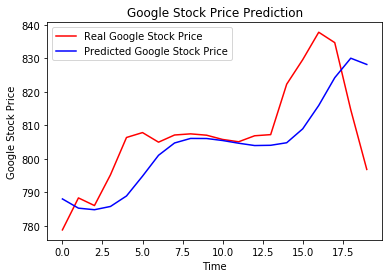

In [55]:
# Visualising the results z Date jako index column
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
